In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #data Visualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv


In [2]:
# Reading data
data = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv')
data.head(10)


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [3]:
#shape of input data
data.shape

(851264, 7)

In [4]:
data.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [5]:
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [6]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [7]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [8]:
data['date']=pd.to_datetime(data['date'])
print(data['date'].dtype)

datetime64[ns]


In [9]:
data.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [10]:
data=data.set_index('date')

In [11]:
data.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [12]:
df_AAPL=data[data['symbol']== 'AAPL']


In [13]:
df_AAPL.sort_index()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...,...
2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0


In [14]:
AAPL_data=df_AAPL.asfreq('b')
AAPL_data.shape

(1825, 6)

In [15]:
AAPL_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [16]:
null_data=AAPL_data[AAPL_data.isnull().any(axis=1)]
null_data.head(10)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-25,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-24,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-17,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
null_dates=null_data.index.tolist()

In [18]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [19]:
modified_df=AAPL_data.drop(holidays)

In [20]:
modified_df.isnull().sum()

symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

In [21]:
modified_df= modified_df.bfill(axis='rows')

In [22]:
modified_df.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

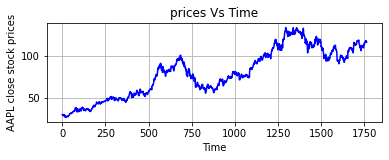

In [23]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter('AAPL')

In [24]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [25]:
train_data = closing_stock[0:n_train]
train_data.shape

(1411, 1)

In [26]:
val_data = closing_stock[n_train:(n_train+n_val)]
val_data.shape

(176, 1)

In [27]:
test_data = closing_stock[(n_train+n_val):len(closing_stock)]
test_data.shape

(177, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train_data)
val=scaler.transform(val_data)
test= scaler.transform(test_data)

In [29]:
train

array([[0.02971783],
       [0.03021854],
       [0.02560389],
       ...,
       [0.833277  ],
       [0.83071923],
       [0.83441365]], dtype=float32)

In [30]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)


In [31]:
n_features = 2
trainX, trainY =  create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [32]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


In [33]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [34]:
model=keras.Sequential([])


2022-07-12 10:07:58.429636: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [35]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [36]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [38]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

2022-07-12 10:07:59.505895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
11/11 [==============================] - 6s 144ms/step - loss: 0.1731 - mean_squared_error: 0.1731 - val_loss: 0.2503 - val_mean_squared_error: 0.2503
Epoch 2/100
11/11 [==============================] - 0s 17ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 3/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 4/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 7/100
11/11 [========

In [39]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00019 , RMSE: 0.01
Validation Score:
MSE: 0.00043 , RMSE: 0.02
Test Score:
MSE: 0.00028 , RMSE: 0.02


In [40]:
pred=model.predict(testX)

In [41]:
pred=scaler.inverse_transform(pred)
pred

array([[105.018715],
       [104.535034],
       [103.86693 ],
       [ 99.36669 ],
       [ 95.29557 ],
       [ 93.60902 ],
       [ 93.18909 ],
       [ 94.1695  ],
       [ 94.01864 ],
       [ 93.07213 ],
       [ 92.42098 ],
       [ 92.29793 ],
       [ 92.73545 ],
       [ 92.341255],
       [ 90.61525 ],
       [ 90.02668 ],
       [ 92.29965 ],
       [ 93.13589 ],
       [ 93.71307 ],
       [ 93.82389 ],
       [ 94.37764 ],
       [ 95.503624],
       [ 96.860535],
       [ 98.46358 ],
       [ 99.53637 ],
       [ 99.752014],
       [ 99.411995],
       [ 98.33703 ],
       [ 97.39946 ],
       [ 97.291214],
       [ 97.821365],
       [ 98.31302 ],
       [ 98.383316],
       [ 98.819275],
       [ 98.51157 ],
       [ 97.26996 ],
       [ 96.86654 ],
       [ 96.69545 ],
       [ 96.86083 ],
       [ 95.53651 ],
       [ 94.66554 ],
       [ 95.123146],
       [ 95.149376],
       [ 95.3939  ],
       [ 93.797775],
       [ 92.02524 ],
       [ 92.60341 ],
       [ 93.6

In [42]:
testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[105.08]
 [104.35]
 [ 97.82]
 [ 94.83]
 [ 93.74]
 [ 93.64]
 [ 95.18]
 [ 94.19]
 [ 93.24]
 [ 92.72]]


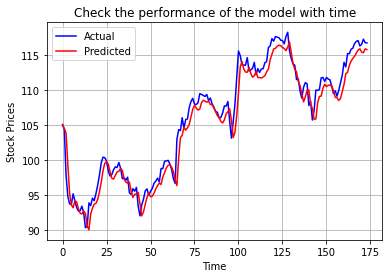

In [43]:
plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()